---
## Data Collection and Setup

---


In [ ]:
# %pip install git+https://github.com/AI4Finance-Foundation/FinRL.git
# %pip install pandas_market_calendars

  Cloning https://github.com/AI4Finance-Foundation/FinRL.git to c:\users\kushf\appdata\local\temp\pip-req-build-cnf5pc4o
  Resolved https://github.com/AI4Finance-Foundation/FinRL.git to commit 9175621d1235a335a667ee4796d7722e555a9e78
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached alpaca_py-0.37.0-py3-none-any.whl.metadata (13 kB)
  Using cached alpaca_trade_api-3.2.0-py3-none-any.whl.metadata (29 kB)
  Using cached ccxt-3.1.60-py2.py3-none-any.whl.metadata (108 kB)
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to c:\users\kushf\appdata\local\temp\pip-install-ydj2yqsa\elegantrl_a63740f189f6461fbca1783994cb1b69
  Resolved https://github.com/AI4Finance-Foundation/ElegantRL.git 

  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/FinRL.git 'C:\Users\kushf\AppData\Local\Temp\pip-req-build-cnf5pc4o'
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git 'C:\Users\kushf\AppData\Local\Temp\pip-install-ydj2yqsa\elegantrl_a63740f189f6461fbca1783994cb1b69'
  You can safely remove it manually.



   ------------------------ ---------------  78/127 [scikit-learn]
   ------------------------ ---------------  78/127 [scikit-learn]
   ------------------------ ---------------  78/127 [scikit-learn]
   ------------------------ ---------------  78/127 [scikit-learn]
   ------------------------ ---------------  78/127 [scikit-learn]
   ------------------------ ---------------  78/127 [scikit-learn]
   ------------------------ ---------------  78/127 [scikit-learn]
   ------------------------ ---------------  78/127 [scikit-learn]
   ------------------------ ---------------  78/127 [scikit-learn]
   ------------------------ ---------------  78/127 [scikit-learn]
   ------------------------ ---------------  78/127 [scikit-learn]
   ------------------------ ---------------  78/127 [scikit-learn]
   ------------------------ ---------------  78/127 [scikit-learn]
   ------------------------ ---------------  78/127 [scikit-learn]
   ------------------------ ---------------  78/127 [scikit-l

In [1]:
from IPython.display import display

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl import config_tickers

from finrl.agents.stablebaselines3.models import DRLAgent
from finrl.config import INDICATORS, TRAINED_MODEL_DIR, RESULTS_DIR
from finrl.main import check_and_make_directories
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv

import itertools


In [10]:
test_df_finrl = YahooDownloader(start_date = '2025-01-01',
                                end_date = '2025-01-31',
                                ticker_list = ['RELIANCE.NS']).fetch_data()

test_df_finrl.head()

YF deprecation warning: set proxy via new config function: yf.set_config(proxy=proxy)


[*********************100%***********************]  1 of 1 completed

Shape of DataFrame:  (22, 8)


Price,date,close,high,low,open,volume,tic,day
0,2025-01-01,1221.250000,1226.300049,1211.599976,1214.849976,5892590,RELIANCE.NS,2
1,2025-01-02,1241.800049,1244.449951,1220.000000,1221.250000,15486276,RELIANCE.NS,3
2,2025-01-03,1251.150024,1262.050049,1235.500000,1243.900024,15521102,RELIANCE.NS,4
3,2025-01-06,1218.000000,1262.000000,1215.000000,1253.949951,14816766,RELIANCE.NS,0
4,2025-01-07,1240.849976,1244.500000,1221.250000,1222.000000,10070505,RELIANCE.NS,1


In [11]:
# List of NIFTY 50 tickers (as of 2024, with .NS suffix for yfinance)
nifty50_tickers = [
    "ADANIENT.NS",    # Adani Enterprises
    "ADANIPORTS.NS",  # Adani Ports & SEZ
    "APOLLOHOSP.NS",  # Apollo Hospitals
    "ASIANPAINT.NS",  # Asian Paints
    "AXISBANK.NS",    # Axis Bank
    "BAJAJ-AUTO.NS",  # Bajaj Auto
    "BAJFINANCE.NS",  # Bajaj Finance
    "BAJAJFINSV.NS",  # Bajaj Finserv
    "BEL.NS",         # Bharat Electronics
    "BHARTIARTL.NS",  # Bharti Airtel
    "CIPLA.NS",       # Cipla
    "COALINDIA.NS",   # Coal India
    "DRREDDY.NS",     # Dr. Reddy's
    "EICHERMOT.NS",   # Eicher Motors
    
    # New stock so very less data
    # "ETERNAL.NS",     # Eternal

    "GRASIM.NS",      # Grasim Industries
    "HCLTECH.NS",     # HCL Technologies
    "HDFCBANK.NS",    # HDFC Bank
    "HDFCLIFE.NS",    # HDFC Life
    "HEROMOTOCO.NS",  # Hero MotoCorp
    "HINDALCO.NS",    # Hindalco Industries
    "HINDUNILVR.NS",  # Hindustan Unilever
    "ICICIBANK.NS",   # ICICI Bank
    "INDUSINDBK.NS",  # IndusInd Bank
    "INFY.NS",        # Infosys
    "ITC.NS",         # ITC
    "JIOFIN.NS",      # Jio Financial Services
    "JSWSTEEL.NS",    # JSW Steel
    "KOTAKBANK.NS",   # Kotak Mahindra Bank
    "LT.NS",          # Larsen & Toubro
    "M&M.NS",         # Mahindra & Mahindra
    "MARUTI.NS",      # Maruti Suzuki India
    "NESTLEIND.NS",   # Nestlé India
    "NTPC.NS",        # NTPC
    "ONGC.NS",        # Oil & Natural Gas Corporation
    "POWERGRID.NS",   # Power Grid Corporation
    "RELIANCE.NS",    # Reliance Industries
    "SBILIFE.NS",     # SBI Life Insurance
    "SBIN.NS",        # State Bank of India
    "SHRIRAMFIN.NS",  # Shriram Finance
    "SUNPHARMA.NS",   # Sun Pharmaceutical
    "TCS.NS",         # Tata Consultancy Services
    "TATACONSUM.NS",  # Tata Consumer Products
    "TATAMOTORS.NS",  # Tata Motors
    "TATASTEEL.NS",   # Tata Steel
    "TECHM.NS",       # Tech Mahindra
    "TITAN.NS",       # Titan Company
    "TRENT.NS",       # Trent
    "ULTRACEMCO.NS",  # UltraTech Cement
    "WIPRO.NS",       # Wipro
]

print(f'NIFTY 50 Tickers ({len(nifty50_tickers)}):')
print(nifty50_tickers)

NIFTY 50 Tickers (49):
['ADANIENT.NS', 'ADANIPORTS.NS', 'APOLLOHOSP.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BEL.NS', 'BHARTIARTL.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'ITC.NS', 'JIOFIN.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SBILIFE.NS', 'SBIN.NS', 'SHRIRAMFIN.NS', 'SUNPHARMA.NS', 'TCS.NS', 'TATACONSUM.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS', 'TECHM.NS', 'TITAN.NS', 'TRENT.NS', 'ULTRACEMCO.NS', 'WIPRO.NS']


In [12]:
TRAIN_START_DATE = '2024-01-01'
TRAIN_END_DATE = '2025-01-1'
TRADE_START_DATE = '2025-01-01'
TRADE_END_DATE = '2025-05-01'

In [13]:
df_raw = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TRADE_END_DATE,
                     ticker_list = nifty50_tickers).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Shape of DataFrame:  (16019, 8)


In [14]:
display(df_raw.head())
display(df_raw.shape)

# df_raw.to_csv('df_raw.csv', index=False)

Price,date,close,high,low,open,volume,tic,day
0,2024-01-01,2916.023926,2945.811961,2840.904319,2851.150187,2898619,ADANIENT.NS,0
1,2024-01-01,1043.373413,1053.430240,1018.629600,1022.164483,3989711,ADANIPORTS.NS,0
2,2024-01-01,5727.949219,5742.841952,5685.911708,5718.934197,127030,APOLLOHOSP.NS,0
3,2024-01-01,3357.800537,3373.323432,3350.928723,3364.622626,283951,ASIANPAINT.NS,0
4,2024-01-01,1096.853394,1103.148584,1092.157067,1094.155525,4083732,AXISBANK.NS,0


(16019, 8)

### Feature Engineering

In [15]:
fe = FeatureEngineer(use_technical_indicator=True,
                     tech_indicator_list = INDICATORS,
                     use_vix=True,
                     use_turbulence=False,
                     user_defined_feature = False)

processed = fe.preprocess_data(df_raw)

Successfully added technical indicators


[*********************100%***********************]  1 of 1 completed

Shape of DataFrame:  (332, 8)
Successfully added vix


In [16]:
processed.head()
# processed.to_csv('processed.csv', index=False)

,date,close,high,low,open,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix
0,2024-01-02,2931.217773,2947.011453,2839.854717,2920.822064,2671368,ADANIENT.NS,1,0.340888,2945.108195,2902.133504,100.0,66.666667,100.0,2923.620850,2923.620850,13.2
1,2024-01-02,1073.792969,1078.273744,1026.694991,1043.373433,6344621,ADANIPORTS.NS,1,0.682490,1101.602939,1015.563443,100.0,66.666667,100.0,1058.583191,1058.583191,13.2
2,2024-01-02,5724.264160,5760.424448,5658.169077,5716.045869,166449,APOLLOHOSP.NS,1,-0.082678,5731.318149,5720.895230,0.0,-66.666667,100.0,5726.106689,5726.106689,13.2
3,2024-01-02,3353.104004,3360.568665,3307.276621,3357.701467,552394,ASIANPAINT.NS,1,-0.105371,3362.094171,3348.810370,0.0,-66.666667,100.0,3355.452271,3355.452271,13.2
4,2024-01-02,1092.406982,1098.502254,1081.465475,1094.255531,7895577,AXISBANK.NS,1,-0.099759,1100.918363,1088.342013,0.0,-66.666667,100.0,1094.630188,1094.630188,13.2


In [17]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)
processed_full.head()
# processed_full.to_csv('processed_full.csv', index=False)


,date,tic,close,high,low,open,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix
0,2024-01-02,ADANIENT.NS,2931.217773,2947.011453,2839.854717,2920.822064,2671368.0,1.0,0.340888,2945.108195,2902.133504,100.0,66.666667,100.0,2923.620850,2923.620850,13.2
1,2024-01-02,ADANIPORTS.NS,1073.792969,1078.273744,1026.694991,1043.373433,6344621.0,1.0,0.682490,1101.602939,1015.563443,100.0,66.666667,100.0,1058.583191,1058.583191,13.2
2,2024-01-02,APOLLOHOSP.NS,5724.264160,5760.424448,5658.169077,5716.045869,166449.0,1.0,-0.082678,5731.318149,5720.895230,0.0,-66.666667,100.0,5726.106689,5726.106689,13.2
3,2024-01-02,ASIANPAINT.NS,3353.104004,3360.568665,3307.276621,3357.701467,552394.0,1.0,-0.105371,3362.094171,3348.810370,0.0,-66.666667,100.0,3355.452271,3355.452271,13.2
4,2024-01-02,AXISBANK.NS,1092.406982,1098.502254,1081.465475,1094.255531,7895577.0,1.0,-0.099759,1100.918363,1088.342013,0.0,-66.666667,100.0,1094.630188,1094.630188,13.2


In [18]:
# Split the data into training and trading datasets
train = data_split(processed_full, TRAIN_START_DATE, TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE, TRADE_END_DATE)

# Save the datasets to CSV files
train.to_csv('train_data.csv')
trade.to_csv('trade_data.csv')

---
## Train

---

In [30]:
# Import configure from stable_baselines3 logger to customize logging configuration for the RL training process
from stable_baselines3.common.logger import configure

from IPython.display import display

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl import config_tickers

from finrl.agents.stablebaselines3.models import DRLAgent
from finrl.config import INDICATORS, TRAINED_MODEL_DIR, RESULTS_DIR
from finrl.main import check_and_make_directories
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv

import itertools


In [31]:
train = pd.read_csv('train_data.csv')

train = train.set_index(train.columns[0])
train.index.names = ['']

In [32]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 48, State Space: 481


In [33]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}


e_train_gym = StockTradingEnv(df = train, **env_kwargs)

In [34]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [35]:
agent = DRLAgent(env = env_train)

# Set the corresponding values to 'True' for the algorithms that you want to use
if_using_a2c = True
if_using_ddpg = True
if_using_ppo = True
if_using_td3 = True
if_using_sac = True

### A2C

In [25]:
agent = DRLAgent(env = env_train)
model_a2c = agent.get_model("a2c")

if if_using_a2c:
  # set up logger
  tmp_path = RESULTS_DIR + '/a2c'
  new_logger_a2c = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_a2c.set_logger(new_logger_a2c)

trained_a2c = agent.train_model(model=model_a2c,
                             tb_log_name='a2c',
                             total_timesteps=50000) if if_using_a2c else None  

{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cpu device
Logging to results/a2c
--------------------------------------
| time/                 |            |
|    fps                | 98         |
|    iterations         | 100        |
|    time_elapsed       | 5          |
|    total_timesteps    | 500        |
| train/                |            |
|    entropy_loss       | -68.2      |
|    explained_variance | 0          |
|    learning_rate      | 0.0007     |
|    n_updates          | 99         |
|    policy_loss        | 45.4       |
|    reward             | 0.46644217 |
|    std                | 1          |
|    value_loss         | 0.864      |
--------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 115        |
|    iterations         | 200        |
|    time_elapsed       | 8          |
|    total_timesteps    | 1000       |
| train/                |            |
|    

In [26]:
trained_a2c.save(TRAINED_MODEL_DIR + "/agent_a2c") if if_using_a2c else None

c:\Users\kushf\Desktop\RL Portfolio\env\Lib\site-packages\stable_baselines3\common\save_util.py:284: UserWarning: Path 'trained_models' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


### DDPG

In [27]:
agent = DRLAgent(env = env_train)
model_ddpg = agent.get_model("ddpg")

if if_using_ddpg:
  # set up logger
  tmp_path = RESULTS_DIR + '/ddpg'
  new_logger_ddpg = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ddpg.set_logger(new_logger_ddpg)

trained_ddpg = agent.train_model(model=model_ddpg,
                             tb_log_name='ddpg',
                             total_timesteps=10000) if if_using_ddpg else None

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device
Logging to results/ddpg
day: 242, episode: 210
begin_total_asset: 1000000.00
end_total_asset: 1239378.06
total_reward: 239378.06
total_cost: 1717.35
total_trades: 4841
Sharpe: 1.535
------------------------------------
| time/              |             |
|    episodes        | 4           |
|    fps             | 14          |
|    time_elapsed    | 68          |
|    total_timesteps | 972         |
| train/             |             |
|    actor_loss      | 198         |
|    critic_loss     | 8.64        |
|    learning_rate   | 0.001       |
|    n_updates       | 871         |
|    reward          | -0.69460225 |
------------------------------------
------------------------------------
| time/              |             |
|    episodes        | 8           |
|    fps             | 13          |
|    time_elapsed    | 143         |
|    total_timesteps | 1944        |
| train/             |          

In [28]:
trained_ddpg.save(TRAINED_MODEL_DIR + "/agent_ddpg") if if_using_ddpg else None

### PPO

In [29]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.00025,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

if if_using_ppo:
  # set up logger
  tmp_path = RESULTS_DIR + '/ppo'
  new_logger_ppo = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ppo.set_logger(new_logger_ppo)

trained_ppo = agent.train_model(model=model_ppo,
                             tb_log_name='ppo',
                             total_timesteps=50000) if if_using_ppo else None

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 128}
Using cpu device
Logging to results/ppo
day: 242, episode: 250
begin_total_asset: 1000000.00
end_total_asset: 912914.68
total_reward: -87085.32
total_cost: 148678.89
total_trades: 6877
Sharpe: -0.454
-----------------------------------
| time/              |            |
|    fps             | 123        |
|    iterations      | 1          |
|    time_elapsed    | 16         |
|    total_timesteps | 2048       |
| train/             |            |
|    reward          | -0.3190783 |
-----------------------------------
day: 242, episode: 260
begin_total_asset: 1000000.00
end_total_asset: 896573.34
total_reward: -103426.66
total_cost: 160425.84
total_trades: 6864
Sharpe: -0.524
------------------------------------------
| time/                   |              |
|    fps                  | 115          |
|    iterations           | 2            |
|    time_elapsed         | 35           |
|    total_timestep

In [30]:
trained_ppo.save(TRAINED_MODEL_DIR + "/agent_ppo") if if_using_ppo else None

### TD3

In [31]:
agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 100,
              "buffer_size": 1000000,
              "learning_rate": 0.001}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

if if_using_td3:
  # set up logger
  tmp_path = RESULTS_DIR + '/td3'
  new_logger_td3 = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_td3.set_logger(new_logger_td3)

trained_td3 = agent.train_model(model=model_td3,
                             tb_log_name='td3',
                             total_timesteps=10000) if if_using_td3 else None

{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.001}
Using cpu device


c:\Users\kushf\Desktop\RL Portfolio\env\Lib\site-packages\stable_baselines3\common\buffers.py:242: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 4.05GB > 1.75GB
  warnings.warn(


Logging to results/td3
-----------------------------------
| time/              |            |
|    episodes        | 4          |
|    fps             | 25         |
|    time_elapsed    | 38         |
|    total_timesteps | 972        |
| train/             |            |
|    actor_loss      | 163        |
|    critic_loss     | 34.3       |
|    learning_rate   | 0.001      |
|    n_updates       | 871        |
|    reward          | 0.50304693 |
-----------------------------------
-----------------------------------
| time/              |            |
|    episodes        | 8          |
|    fps             | 22         |
|    time_elapsed    | 84         |
|    total_timesteps | 1944       |
| train/             |            |
|    actor_loss      | 164        |
|    critic_loss     | 131        |
|    learning_rate   | 0.001      |
|    n_updates       | 1843       |
|    reward          | 0.50304693 |
-----------------------------------
day: 242, episode: 470
begin_total_asset:

In [32]:
trained_td3.save(TRAINED_MODEL_DIR + "/agent_td3") if if_using_td3 else None

### SAC

In [36]:
agent = DRLAgent(env = env_train)
SAC_PARAMS = {"batch_size": 100,
              "buffer_size": 1000000, 
              "learning_rate": 0.001}

model_sac = agent.get_model("sac", model_kwargs = SAC_PARAMS)

if if_using_sac:
    # set up logger
    tmp_path = RESULTS_DIR + '/sac'
    new_logger_sac = configure(tmp_path, ["stdout", "csv", "tensorboard"])
    # Set new logger
    model_sac.set_logger(new_logger_sac)

trained_sac = agent.train_model(model=model_sac,
                             tb_log_name='sac',
                             total_timesteps=10000) if if_using_sac else None

{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.001}
Using cpu device


c:\Users\kushf\Desktop\RL Portfolio\env\Lib\site-packages\stable_baselines3\common\buffers.py:242: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 4.05GB > 1.06GB
  warnings.warn(


Logging to results/sac
-----------------------------------
| time/              |            |
|    episodes        | 4          |
|    fps             | 26         |
|    time_elapsed    | 37         |
|    total_timesteps | 972        |
| train/             |            |
|    actor_loss      | 7.95e+03   |
|    critic_loss     | 1.34e+04   |
|    ent_coef        | 2.33       |
|    ent_coef_loss   | -534       |
|    learning_rate   | 0.001      |
|    n_updates       | 871        |
|    reward          | -1.6499634 |
-----------------------------------
-----------------------------------
| time/              |            |
|    episodes        | 8          |
|    fps             | 22         |
|    time_elapsed    | 86         |
|    total_timesteps | 1944       |
| train/             |            |
|    actor_loss      | 2.41e+04   |
|    critic_loss     | 6.49e+05   |
|    ent_coef        | 6.14       |
|    ent_coef_loss   | -1.15e+03  |
|    learning_rate   | 0.001      |
|    

In [38]:
trained_sac.save(TRAINED_MODEL_DIR + "/agent_sac") if if_using_sac else None

---
## Test

---

In [19]:
# Import RL algorithms from stable_baselines3
from stable_baselines3 import A2C, DDPG, PPO, TD3, SAC

from IPython.display import display

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl import config_tickers

from finrl.agents.stablebaselines3.models import DRLAgent
from finrl.config import INDICATORS, TRAINED_MODEL_DIR, RESULTS_DIR
from finrl.main import check_and_make_directories
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv

import itertools


In [20]:
train = pd.read_csv('train_data.csv')
trade = pd.read_csv('trade_data.csv')

train = train.set_index(train.columns[0])
train.index.names = ['']
trade = trade.set_index(trade.columns[0])
trade.index.names = ['']

In [31]:
if_using_a2c = True
if_using_ddpg = True
if_using_ppo = True
if_using_td3 = True
if_using_sac = True

In [33]:
trained_a2c = A2C.load(TRAINED_MODEL_DIR + "/agent_a2c") if if_using_a2c else None
trained_ddpg = DDPG.load(TRAINED_MODEL_DIR + "/agent_ddpg") if if_using_ddpg else None
trained_ppo = PPO.load(TRAINED_MODEL_DIR + "/agent_ppo") if if_using_ppo else None
trained_td3 = TD3.load(TRAINED_MODEL_DIR + "/agent_td3" , buffer_size=1) if if_using_td3 else None
trained_sac = SAC.load(TRAINED_MODEL_DIR + "/agent_sac") if if_using_sac else None

c:\Users\kushf\Desktop\RL Portfolio\env\Lib\site-packages\stable_baselines3\common\buffers.py:242: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 4.05GB > 0.86GB
  warnings.warn(


In [34]:
stock_dimension = len(trade.tic.unique())
state_space = 1 + 2 * stock_dimension + len(INDICATORS) * stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 48, State Space: 481


In [35]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}

In [36]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

In [37]:
df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_a2c,
    environment = e_trade_gym) if if_using_a2c else (None, None)

hit end!


In [38]:
df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
    model=trained_ddpg,
    environment = e_trade_gym) if if_using_ddpg else (None, None)

hit end!


In [39]:
df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
    model=trained_ppo,
    environment = e_trade_gym) if if_using_ppo else (None, None)

hit end!


In [40]:
df_account_value_td3, df_actions_td3 = DRLAgent.DRL_prediction(
    model=trained_td3,
    environment = e_trade_gym) if if_using_td3 else (None, None)

hit end!


In [41]:
df_account_value_sac, df_actions_sac = DRLAgent.DRL_prediction(
    model=trained_sac,
    environment = e_trade_gym) if if_using_sac else (None, None)

hit end!


In [42]:
df_result_a2c = (
    df_account_value_a2c.set_index(df_account_value_a2c.columns[0])
    if if_using_a2c
    else None
)
df_result_ddpg = (
    df_account_value_ddpg.set_index(df_account_value_ddpg.columns[0])
    if if_using_ddpg
    else None
)
df_result_ppo = (
    df_account_value_ppo.set_index(df_account_value_ppo.columns[0])
    if if_using_ppo
    else None
)
df_result_td3 = (
    df_account_value_td3.set_index(df_account_value_td3.columns[0])
    if if_using_td3
    else None
)

df_result_sac = (
    df_account_value_sac.set_index(df_account_value_sac.columns[0])
    if if_using_sac
    else None
)


result = pd.DataFrame(
    {
        "a2c": df_result_a2c["account_value"] if if_using_a2c else None,
        "ddpg": df_result_ddpg["account_value"] if if_using_ddpg else None,
        "ppo": df_result_ppo["account_value"] if if_using_ppo else None,
        "td3": df_result_td3["account_value"] if if_using_td3 else None,
        "sac": df_result_sac["account_value"] if if_using_sac else None,
    }
)

In [43]:
result

,a2c,ddpg,ppo,td3,sac
date,,,,,
2025-01-02,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1.000000e+06
2025-01-03,9.981288e+05,9.964423e+05,998179.371385,993944.418598,1.001045e+06
2025-01-06,9.900817e+05,9.877324e+05,971434.813851,993875.394458,9.713179e+05
2025-01-07,9.864312e+05,9.902647e+05,961803.842792,989867.839099,9.612808e+05
2025-01-08,9.839208e+05,9.857587e+05,947784.568248,995339.305591,9.426360e+05
...,...,...,...,...,...
2025-04-23,1.049755e+06,1.014536e+06,843989.495992,883036.929493,7.919345e+05
2025-04-24,1.041702e+06,1.015448e+06,841429.295598,885233.089466,7.930548e+05
2025-04-25,1.042980e+06,1.012037e+06,821000.689016,888895.820362,7.738066e+05


In [45]:
TRAIN_START_DATE = '2024-01-01'
TRAIN_END_DATE = '2025-01-1'
TRADE_START_DATE = '2025-01-01'
TRADE_END_DATE = '2025-05-01'

[*********************100%***********************]  1 of 1 completed
C:\Users\kushf\AppData\Local\Temp\ipykernel_7428\3645769070.py:41: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


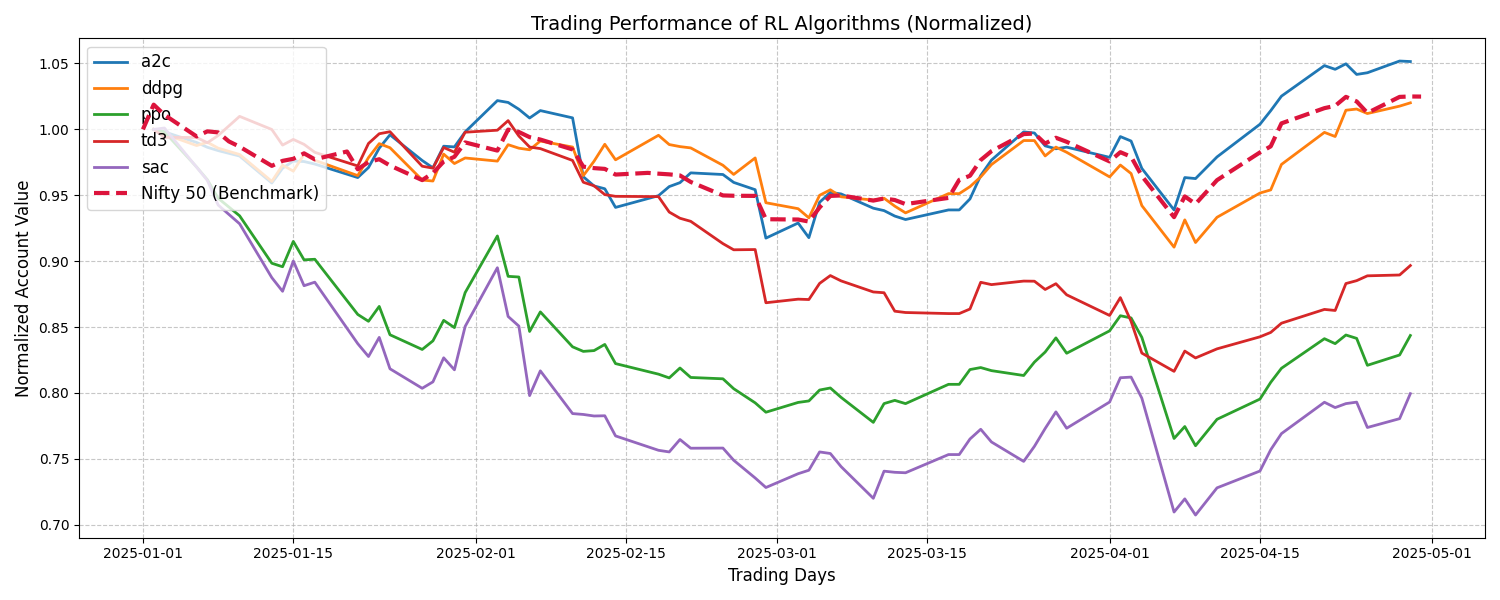

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from IPython.display import Image

# Normalize RL results
normalized_result = result / result.iloc[0]

# Download and normalize Nifty 50 data
nifty_data = yf.download("^NSEI", start=TRADE_START_DATE, end=TRADE_END_DATE)
nifty_norm = nifty_data['Close'] / nifty_data['Close'].iloc[0]

# Plot
plt.figure(figsize=(15, 6))

# Plot normalized RL algorithms
for algo in normalized_result.columns:
    plt.plot(normalized_result.index, normalized_result[algo], label=algo, linewidth=2)

# Plot Nifty 50 - styled for visibility
plt.plot(
    nifty_data.index, nifty_norm,
    label='Nifty 50 (Benchmark)',
    color='crimson',
    linestyle='--',
    linewidth=3,
    zorder=10  # bring to front
)


# Formatting
plt.xlabel("Trading Days", fontsize=12)
plt.ylabel("Normalized Account Value", fontsize=12)
plt.title("Trading Performance of RL Algorithms (Normalized)", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()

# Save and show
plt.savefig('results_normalized.png')
plt.show()

Image('results_normalized.png')
